# PPL 

# Exploratory Data Analysis - Rewards

<br>
<hr>

<h1 style="color:red"> Index</h1>

<br>

### 0. Setup

### 1. Clean

### 2. Exploration

### 3. Visualization


<hr>
<br><br><br>

# 0. Setup

In [4]:
# set root folder (needed for imports)
import os
while not os.getcwd().endswith("ppl-model"):
    os.chdir("..")

# ignore warning on jupyter
import warnings
warnings.filterwarnings('ignore')


# larger page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# detect changes on folders
%load_ext autoreload
%autoreload 2


# my imports
import settings
from src.data_curation.datasets.rewards.clean import clean, get_stop_words
from dskc import dskc_clean
from dskc import dskc_exploration 
from dskc import dskc_graphs


# third party imports
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<br><br>

# 1. Clean 

In [5]:
df = pd.read_csv(settings.DATASET_REWARDS_PATH, index_col=0)
#df = clean(df)
df.head()

,PROJECT_ID,REWARD_ID,AMOUNT,TITLE,DESCRIPTION
0,1017,18622,10,NaN,Um exemplar do livro
1,1017,18623,20,NaN,Opção 1: PDF do conto (sem ilustrações) + 1 ex...
2,1017,18624,30,NaN,Opção 1: PDF do conto (sem ilustrações) + 1 ed...
3,1017,18625,50,NaN,PDF do conto (sem ilustrações) + 1 edição de l...
4,1017,18626,250,NaN,PDF do conto (sem ilustrações) + 1 edição de l...


<br><br>

# 2. Exploration

In [3]:
dskc_exploration.basic_exploration(df)




 _____     ______     ______   ______
/\  __-.  /\  __ \   /\__  _\ /\  __ \
\ \ \/\ \ \ \  __ \  \/_/\ \/ \ \  __ \
 \ \____-  \ \_\ \_\    \ \_\  \ \_\ \_\
  \/____/   \/_/\/_/     \/_/   \/_/\/_/

 ______     __  __     ______   __         ______     ______     ______     ______   __     ______     __   __
/\  ___\   /\_\_\_\   /\  == \ /\ \       /\  __ \   /\  == \   /\  __ \   /\__  _\ /\ \   /\  __ \   /\ "-.\ \
\ \  __\   \/_/\_\/_  \ \  _-/ \ \ \____  \ \ \/\ \  \ \  __<   \ \  __ \  \/_/\ \/ \ \ \  \ \ \/\ \  \ \ \-.  \
 \ \_____\   /\_\/\_\  \ \_\    \ \_____\  \ \_____\  \ \_\ \_\  \ \_\ \_\    \ \_\  \ \_\  \ \_____\  \ \_\\"\_\
  \/_____/   \/_/\/_/   \/_/     \/_____/   \/_____/   \/_/ /_/   \/_/\/_/     \/_/   \/_/   \/_____/   \/_/ \/_/




First 5 rows 

(transpose view)

                 0      1      2      3      4
-----------  -----  -----  -----  -----  -----
PROJECT_ID    1017   1017   1017   1017   1017
REWARD_ID    18622  18623  18624  18625  18626
AMOUNT  

| Column      | Type   |   Distinct values | Values                                                        |   % Missing |
|-------------|--------|-------------------|---------------------------------------------------------------|-------------|
| PROJECT_ID  | int64  |              6026 | [1017, 1018, 1020, 1022, 1023, 1024, 1025, '...']             |        0    |
| REWARD_ID   | int64  |             24204 | [18622, 18623, 18624, 18625, 18626, 18639, '...']             |        0    |
| AMOUNT      | int64  |               204 | [10, 20, 30, 50, 250, 5, 40, 60, 100, 15, 80, 25, 200, '...'] |        0    |
| TITLE       | object |             13827 | [nan, '...']                                                  |       30.43 |
| DESCRIPTION | object |             23315 | ['Um exemplar do livro', '...']                               |        0.05 |






Pearson's Correlation


(graph)

Columns with values no higher than 0.05: 
- AMOUNT












# 3. Visualization

## 3.1 Graphs

In [31]:
dskc_graphs.all_graphs(df, gui=True)

Dropdown(description='Column:', options=('0. DESCRIPTION_topic_1', '1. DESCRIPTION_topic_2', '2. DESCRIPTION_t…

## 3.2 Topic Modeling

saving model... 

|   Num Topics |   Coherence |
|--------------|-------------|
|            2 |        0.35 |
|            3 |        0.41 |
|            4 |        0.41 |
|            5 |        0.41 |
|            6 |        0.45 |
|            7 |        0.42 |
|            8 |        0.4  |
|            9 |        0.47 |
|           10 |        0.47 |
|           11 |        0.46 |
|           12 |        0.45 |
|           13 |        0.44 |
|           14 |        0.43 |
|           15 |        0.46 |
|           16 |        0.44 |
|           17 |        0.45 |
|           18 |        0.46 |
|           19 |        0.46 |

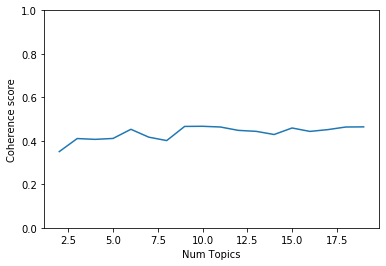

In [9]:
n_components=5
lda_file = "{}lda-{}.sav".format(settings.MODEL_PATH,n_components)
dskc_clean.topic_modeling(df,"title_description", 
                          modify=False,
                          force_train=True,
                          n_components=n_components,
                          search=True,
                          visualize=True,
                          path=lda_file,
                          stop_words=get_stop_words())

In [29]:
df.columns

Index(['DESCRIPTION_topic_1', 'DESCRIPTION_topic_2', 'DESCRIPTION_topic_3', 'DESCRIPTION_topic_4', 'DESCRIPTION_topic_5', 'DESCRIPTION_topic_6', 'DESCRIPTION_topic_7', 'DESCRIPTION_topic_8', 'DESCRIPTION_topic_9', 'DESCRIPTION_topic_10', 'PID', 'DESCRIPTION_prob_dominant_topic', 'DESCRIPTION_dominant_topic', 'AMOUNT', 'TITLE', 'DESCRIPTION'], dtype='object')